<a href="https://colab.research.google.com/github/ViktoriaBegisheva/CVapplication/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%A7%D0%B0%D1%81%D0%BE%D0%B2%D0%BE%D0%B3%D0%BE_%D0%A0%D1%8F%D0%B4%D1%83%2C_%D0%91%D0%B5%D0%B3%D1%96%D1%88%D0%B5%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Часові ряди**



---


Виконала: Вікторія Бегішева, група: актуарна та фінансова математика

---



Завдання: проаналізувати часовий ряд.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import shapiro

# ПІДГОТОВКА ДАНИХ

In [ ]:
data_content = """1701784
1737794
2298683
1997694
2214161
1801721
1401479
1629104
1768658
1982461
1930368
1663348
2029217
2066818
2134854
1979950
2224762
2224194
2051276
1822372
1998723
2446094
2531762
2159429
2665839
2557077
2848757
2810180
2958761
2706793
2730226
2450019
3278451
2937969
3066092
2638793
2598159
2644797
3104692
2837273
2877553
2792334
2667955
2538405
2907441
3167801
2912668
2723394
3116867
2992581
3459004
3292459
3293995
3335937
3098569
2879133
3144001
3684560
3829250
3775736
3439915
3339054
4117851
3659749
3997359
3707592
3771042
3774913
4973988
5563412
4962036
4433059
4796243
5078432
5516536
5423005
5067807
5073183
5624113
6040066
5372689
5904272
5373061
4549990
5665096
5136321
6121433
5552584
6184081
5033496
5251361
4985314
5319428
6146267
5953050
5464673
6701768
6175371
7371741
7207160
6814576
6650843"""

with open('2006-2014.txt', 'w') as f:
    f.write(data_content)

try:
    df = pd.read_csv('2006-2014.txt', header=None, names=['Value'])
    # Створюємо індекс дат. 108 точок даних, 9 років (2006-2014), помісячно
    df.index = pd.date_range(start='2006-01-01', periods=len(df), freq='M')
    print("Дані успішно завантажено.")
    print(df.head())
except Exception as e:
    print(f"Помилка завантаження: {e}")

Дані успішно завантажено.
              Value
2006-01-31  1701784
2006-02-28  1737794
2006-03-31  2298683
2006-04-30  1997694
2006-05-31  2214161


/tmp/ipython-input-694471756.py:110: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.index = pd.date_range(start='2006-01-01', periods=len(df), freq='M')




---



# 1.ВІЗУАЛЬНИЙ АНАЛІЗ (СТАЦІОНАРНІСТЬ)

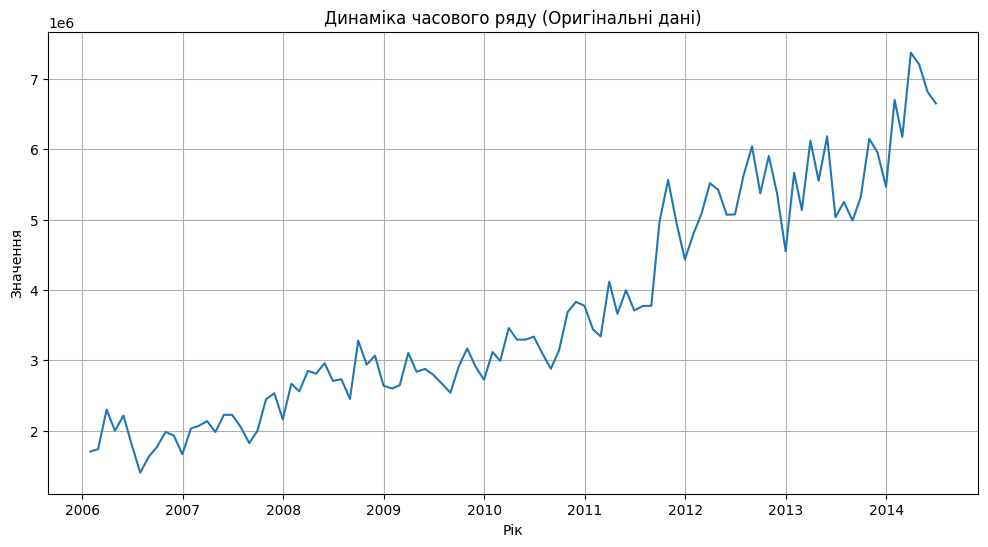

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Value'])
plt.title('Динаміка часового ряду (Оригінальні дані)')
plt.xlabel('Рік')
plt.ylabel('Значення')
plt.grid(True)
plt.show()

Висновки:
- Чи є тренд? Так, спостерігається чіткий висхідний тренд.
- Чи є сезонність? Так, видно регулярні коливання.
- Чи змінюється дисперсія? Так, амплітуда коливань зростає з часом.


=> Ряд НЕ є стаціонарним.



---



# 2.ЛОГАРИФМУВАННЯ (СТАБІЛІЗАЦІЯ ДИСПЕРСІЇ)

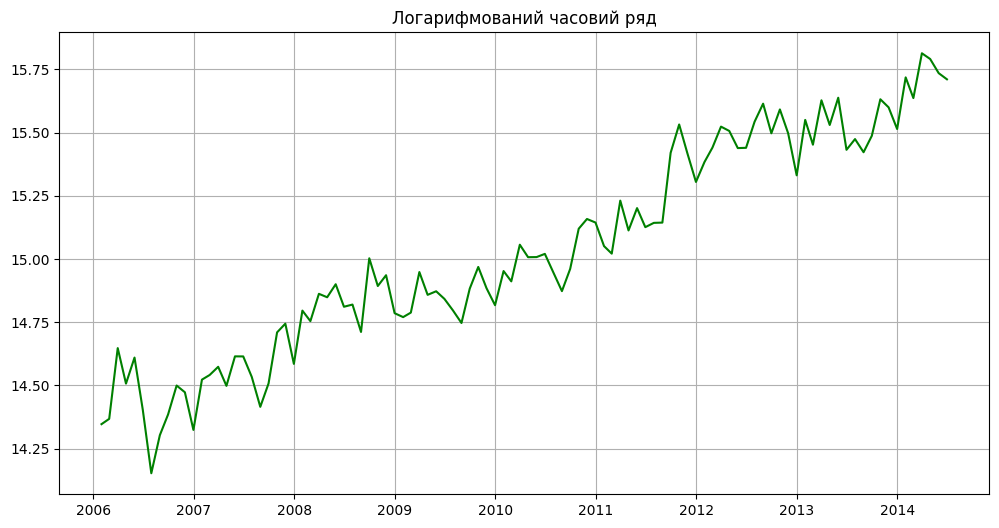

In [ ]:
df['Log_Value'] = np.log(df['Value'])

plt.figure(figsize=(12, 6))
plt.plot(df['Log_Value'], color='green')
plt.title('Логарифмований часовий ряд')
plt.grid(True)
plt.show()

Логарифмування візуально 'вирівнює' амплітуду коливань (стабілізує дисперсію). Далі будемо працювати з логарифмованими даними.



---



# 3.ФОРМАЛЬНІ ТЕСТИ (ADF & KPSS)

Тест Augmented Dickey-Fuller

In [ ]:
def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    if dftest[1] <= 0.05:
        print("Висновок: Ряд стаціонарний (Відхиляємо H0)")
    else:
        print("Висновок: Ряд НЕ стаціонарний (Не можемо відхилити H0)")


Тестуємо логарифмовані дані

In [ ]:
adf_test(df['Log_Value'])

Test Statistic                  0.226250
p-value                         0.973696
#Lags Used                      5.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
Висновок: Ряд НЕ стаціонарний (Не можемо відхилити H0)


Тест KPSS

In [ ]:
def kpss_test(timeseries):
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print(kpss_output)
    if kpsstest[1] <= 0.05:
        print("Висновок: Ряд НЕ стаціонарний (Відхиляємо H0)")
    else:
        print("Висновок: Ряд стаціонарний (Не можемо відхилити H0)")


Тестуємо логарифмовані дані

In [ ]:
kpss_test(df['Log_Value'])

Test Statistic           1.753629
p-value                  0.010000
Lags Used                5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
Висновок: Ряд НЕ стаціонарний (Відхиляємо H0)


/tmp/ipython-input-1604658623.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


перевіремо також з параметром regression='c' та regression='ct' - тренд

In [ ]:
def extended_stationarity_test(series):
    print("\n--- Augmented Dickey-Fuller Test ---")
    for reg in ['c', 'ct']:
        print(f"Regression: {reg}")
        res = adfuller(series, regression=reg, autolag='AIC')
        print(f"  p-value: {res[1]:.4f}")

    print("\n--- KPSS Test ---")
    for reg in ['c', 'ct']:
        print(f"Regression: {reg}")
        res = kpss(series, regression=reg, nlags="auto")
        print(f"  p-value: {res[1]:.4f}")

extended_stationarity_test(df['Log_Value'])


--- Augmented Dickey-Fuller Test ---
Regression: c
  p-value: 0.9737
Regression: ct
  p-value: 0.1495

--- KPSS Test ---
Regression: c
  p-value: 0.0100
Regression: ct
  p-value: 0.1000


/tmp/ipython-input-427410379.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  res = kpss(series, regression=reg, nlags="auto")
/tmp/ipython-input-427410379.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  res = kpss(series, regression=reg, nlags="auto")




---



# 4.СЕЗОННА СКЛАДОВА

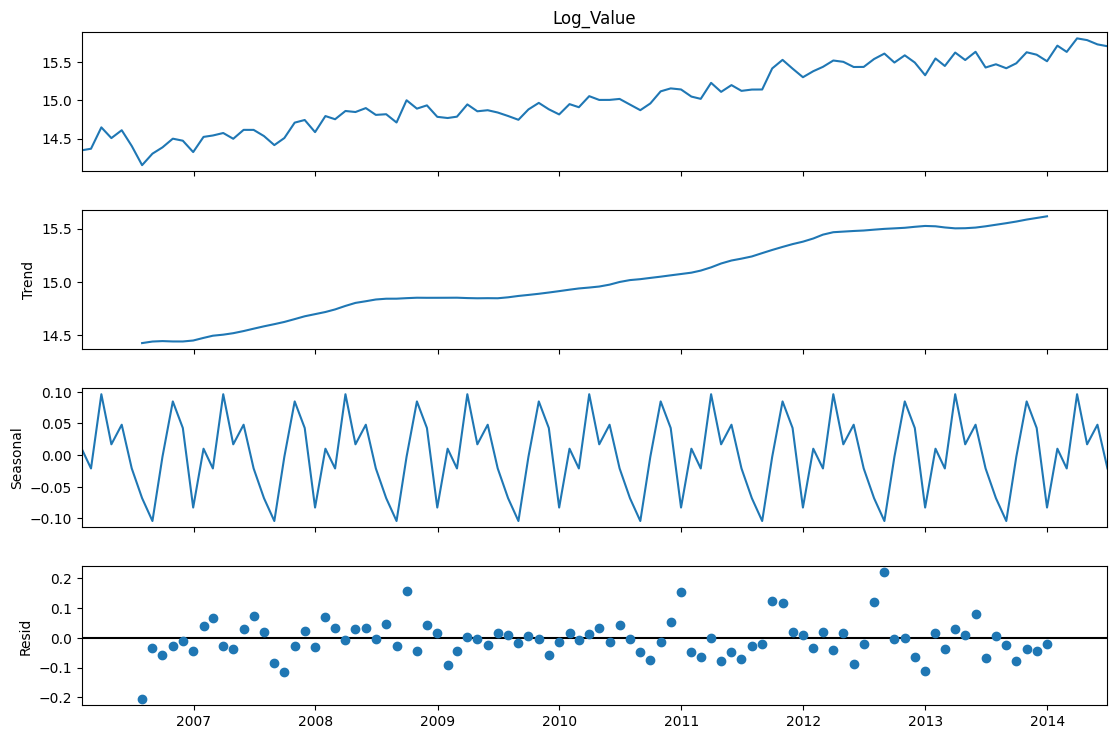

In [ ]:
decomposition = seasonal_decompose(df['Log_Value'], model='additive')
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

Графік 'Seasonal' демонструє чіткий повторюваний патерн. Сезонність присутня.



---



# 5.ACF та PACF (ВИБІР ПОРЯДКУ МОДЕЛІ)

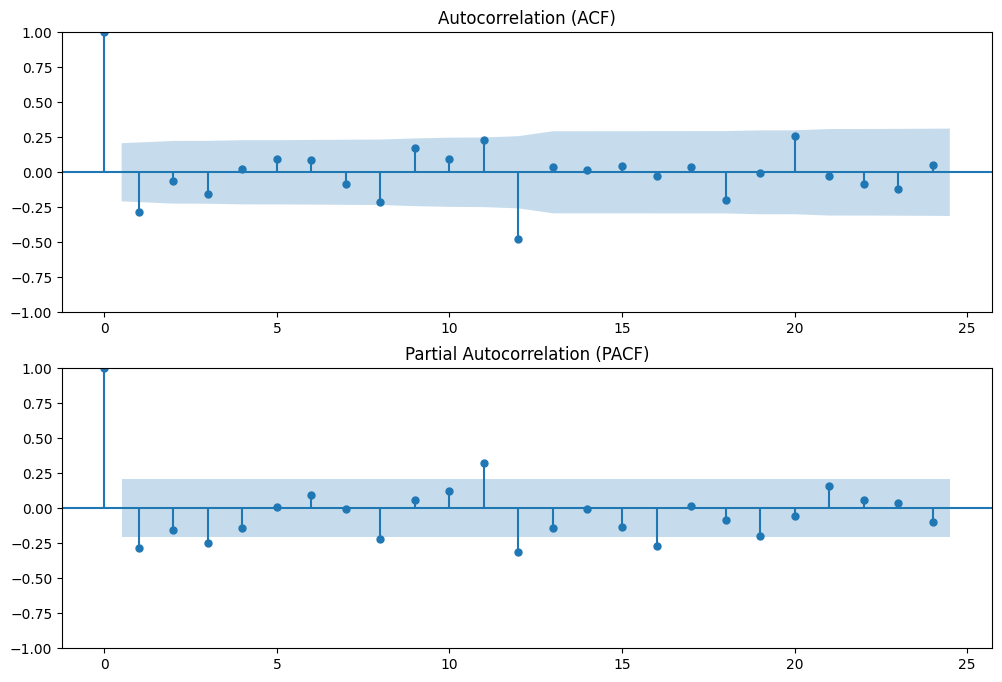

In [ ]:
df['Log_Diff'] = df['Log_Value'].diff(1)
df['Log_Diff_Seas'] = df['Log_Value'].diff(1).diff(12)

data_for_acf = df['Log_Diff_Seas'].dropna()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data_for_acf, lags=24, ax=ax1, title="Autocorrelation (ACF)")
plot_pacf(data_for_acf, lags=24, ax=ax2, title="Partial Autocorrelation (PACF)")
plt.show()

ВИСНОВКИ:
1. ACF: Значущий пік на лагу 1 (q=1) та на лагу 12 (сезонне Q=1).
2. PACF: Значущий пік на лагу 1 (p=1) та сплески на лагах 11-12 (сезонне P=1).
3. Це вказує на модель SARIMA(1,1,1)x(1,1,1,12).



---



# 6.ОЦІНКА ПАРАМЕТРІВ МОДЕЛІ ARMA/ARIMA

Використовуємо SARIMA, бо графіки показали сильну сезонність на 12-му лагу.

(p, d, q) = (1, 1, 1) - несезонна частина

(P, D, Q, s) = (1, 1, 1, 12) - сезонна частина (12 місяців)

In [ ]:

model = ARIMA(df['Log_Value'],
              order=(1, 1, 1),
              seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

print(model_fit.summary())

print("\nАналіз результатів оцінки (Крок 6):")
print("1. Перевірте стовпчик 'P>|z|'. Якщо значення < 0.05, параметр значущий.")
print(f"2. AIC моделі: {model_fit.aic:.2f} (Чим менше, тим краще)")

                                    SARIMAX Results                                     
Dep. Variable:                        Log_Value   No. Observations:                  102
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  88.794
Date:                          Mon, 24 Nov 2025   AIC                           -167.588
Time:                                  20:54:49   BIC                           -155.144
Sample:                              01-31-2006   HQIC                          -162.572
                                   - 06-30-2014                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3141      0.210      1.494      0.135      -0.098       0.726
ma.L1         -0.7438      0.174     -4.278      0.

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


У колонці  P>|z| значення для ar.S.L12 досить велике = 0.654, якщо порівнювати з 0.05.

=> цей параметр не дуже значущий

Підберемо найкращі параметри (для яких AIC найменше)

In [ ]:
p = d = q = range(0, 2)
P = D = Q = range(0, 2)
s = 12

best_aic = float("inf")
best_order = None
best_seasonal_order = None
best_model = None

for p_ in range(2): # max_p=1
    for q_ in range(2): # max_q=1
        for P_ in range(2): # max_P=1
            for Q_ in range(2): # max_Q=1
                try:
                    model = ARIMA(df['Log_Value'],
                                  order=(p_, 1, q_),
                                  seasonal_order=(P_, 1, Q_, 12))
                    results = model.fit()

                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p_, 1, q_)
                        best_seasonal_order = (P_, 1, Q_, 12)
                        best_model = results

                    print(f"ARIMA{best_order}x{best_seasonal_order}12 - AIC:{results.aic:.2f}")
                except:
                    continue

print(f"\nНАЙКРАЩА МОДЕЛЬ: ARIMA{best_order}x{best_seasonal_order}1")
print(f"AIC: {best_aic:.2f}")

print("\n--- Коефіцієнти моделі ---")
param_names = best_model.params.index
params_as_dict = dict(zip(param_names, best_model.params))

for key, value in params_as_dict.items():
    print(f"{key:<15} {value:<15.4f}")


ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-121.86
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-157.02
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-147.44
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-155.18
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-132.05
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-168.84
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-156.55
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-167.19
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-127.47
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-163.74
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-153.65
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-162.21
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-132.24


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-169.32
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-156.92
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-167.59

НАЙКРАЩА МОДЕЛЬ: ARIMA(1, 1, 1)x(0, 1, 1, 12)1
AIC: -169.32

--- Коефіцієнти моделі ---
ar.L1           0.3246         
ma.L1           -0.7498        
ma.S.L12        -0.9518        
sigma2          0.0062         


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


НАЙКРАЩА МОДЕЛЬ: ARIMA(1, 1, 1)x(0, 1, 1, 12)

# 7.ДІАГНОСТИКА МОДЕЛІ

Залишки мають бути нормально розподілені.

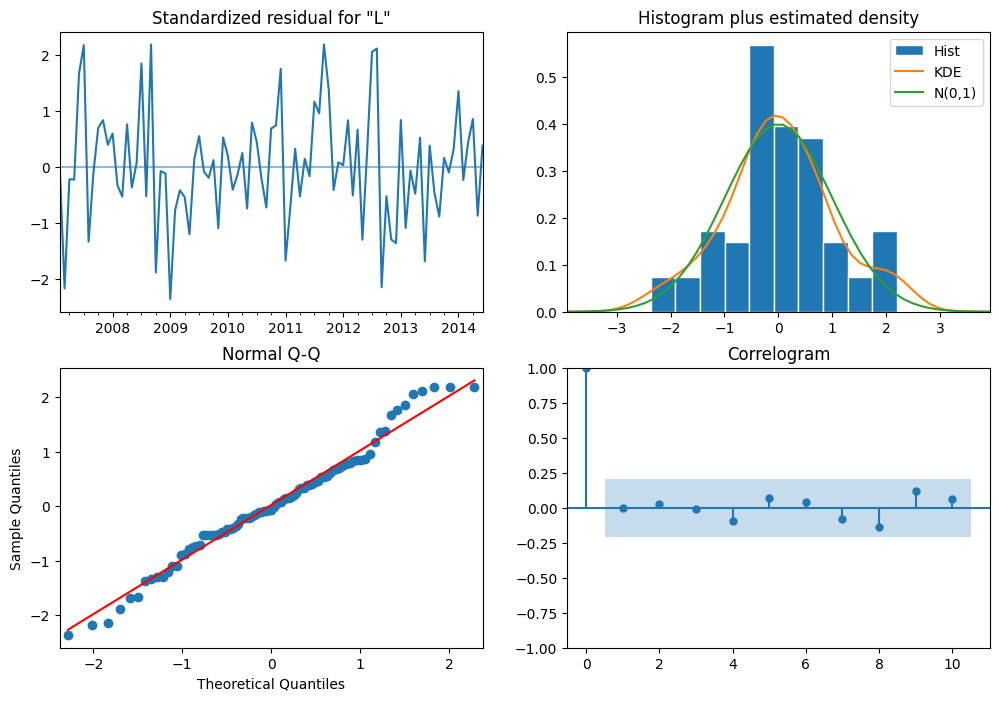

Shapiro-Wilk Test: p-value=0.3057
Тест Шапіро-Уїлка на нормальність залишків: Statistic=0.9832, p-value=0.3057
Залишки розподілені нормально (не відхиляємо H0)


In [ ]:
best_model.plot_diagnostics(figsize=(12, 8))
plt.show()

shapiro_test = shapiro(best_model.resid[13:])
print(f"Shapiro-Wilk Test: p-value={shapiro_test[1]:.4f}")
print(f"Тест Шапіро-Уїлка на нормальність залишків: Statistic={shapiro_test[0]:.4f}, p-value={shapiro_test[1]:.4f}")
if shapiro_test[1] > 0.05:
    print("Залишки розподілені нормально (не відхиляємо H0)")
else:
    print("Залишки НЕ розподілені нормально (відхиляємо H0)")

Залишки розподілені нормально (не відхиляємо H0)



---



# 8.ПРОГНОЗУВАННЯ

Прогнозування на 12 місяців

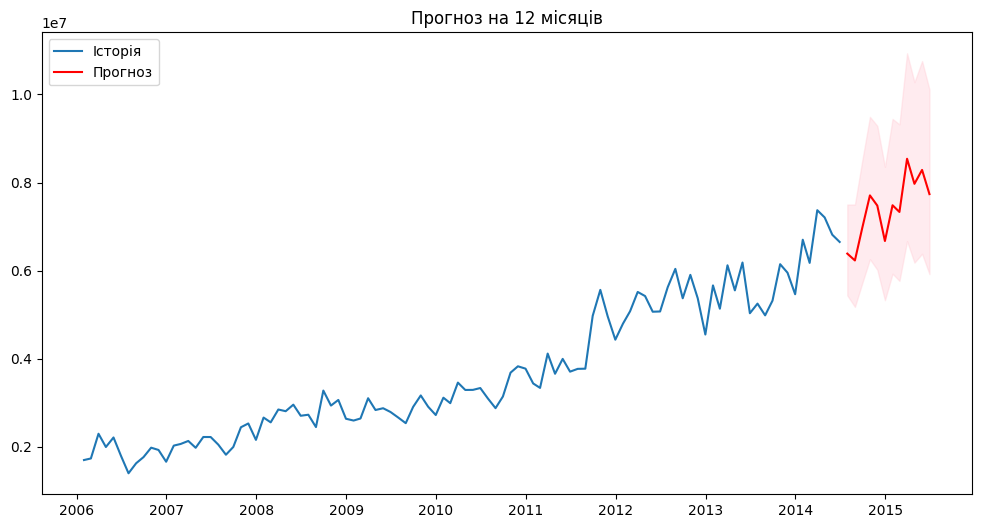

Прогнозні значення:
2014-07-31    6386426.0
2014-08-31    6231472.0
2014-09-30    6972292.0
2014-10-31    7707461.0
2014-11-30    7476222.0
2014-12-31    6672398.0
2015-01-31    7483817.0
2015-02-28    7331727.0
2015-03-31    8538933.0
2015-04-30    7970244.0
2015-05-31    8285701.0
2015-06-30    7736862.0
Freq: ME, Name: predicted_mean, dtype: float64


In [ ]:
forecast_steps = 12
forecast = best_model.get_forecast(steps=forecast_steps)
mean_forecast = np.exp(forecast.predicted_mean) # Повертаємо з логарифмів
conf_int = np.exp(forecast.conf_int())

plt.figure(figsize=(12, 6))
plt.plot(np.exp(df['Log_Value']), label='Історія')
plt.plot(mean_forecast.index, mean_forecast, label='Прогноз', color='red')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Прогноз на 12 місяців')
plt.legend()
plt.show()

print("Прогнозні значення:")
print(round(mean_forecast))



---

